# Assignment Goals

Assignment 6 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

In [1]:
# Set up the imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# The following imports are assumed for the rest of the problems
import numpy as np
from numpy import cos, sin, pi, exp 

# GENERAL INFORMATION ABOUT CODE AND FLOW OF CODE
- Due to some unclearity in problem statement I solved all the 4 problem statement using individual approach and after that i wrote a generalised function for solving general multivariable function.
- Firstly first four statement are solved in the order 1,4(because both are 1-D ) and after that 3 and 4


### For solving problem 1 and problem 4 i have written two function one is for given derivative and another is for if the derivative is not given.
- when the derivative is not given i am using the approach :
 - **f'(x)=(f(x+dx)-f(x))/dx** for finding the derivate at a particular x by using dx as some very small value.
 

# gradient_discent function for given derivative 1-D

In [3]:
def grad_descent(func,deri,start_point,learning_rate):
    total_iteration=100
    min_lst=[]
    min_point=start_point
    for i in range(total_iteration):
        point=min_point
        min_point=min_point-deri(point)*learning_rate
        min_lst.append(min_point)
        if(abs(min_point-point)<1e-7):
            break
        
            
    return min_point , min_lst   
        

# gradient_descent for 1-variable when derivative is not given

In [4]:
def derivative(func,point):
    dx=1e-11
    return (func(point+dx)-func(point))/dx

def grad_descent_mod(func,start_point,ending_point,learning_rate=0.1):
   
    min_point=start_point
    min_lst=[]
    overall_min=100000
    final_min=start_point

    check_min_value_point=np.linspace(start_point,ending_point,100)  # to avoid getting max we will iterate through all the 100 value and find 
    # the minimum among all the initial value 
    for ele in check_min_value_point:
        min_point=ele
        new_lst=[]
        cnt=0
        while(min_point<=ending_point and cnt<10000):
            point=min_point
            cnt+=1
            min_point=min_point - derivative(func,point)*learning_rate
            new_lst.append(min_point)
            if(abs(min_point-point)<1e-7):
                break
        if(func(min_point)<overall_min): #if new min_point is better then change the minimum
            overall_min=func(min_point)
            final_min=min_point
            min_lst.clear()
            for ele in new_lst:
                min_lst.append(ele)
            


    # while(min_point<=ending_point):
    #     point=min_point
    #     min_point=min_point - derivative(func,point)*learning_rate
    #     min_lst.append(min_point)
    #     if(abs(min_point-point)<1e-7):
    #         break
            
    return final_min ,min_lst ,overall_min

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

In [5]:
def f1(x):
    return x ** 2 + 3 * x + 8
# derivative function for f1
def df1_dx(x):
    return 2*x+3

# Define the starting point and learning rate

start_point = -5
learning_rate = 0.1


# Use the gradient_descent function to find the minimum

minimum,lst= grad_descent(f1, df1_dx, start_point, learning_rate)
print(f'Minium point is :{minimum,} and value is {f1(minimum)}')
# print(lst)

mini1,lst1,ss=grad_descent_mod(f1,-5,5,0.1)
print(f'Using genaralised gradient descent Minimum point is : {mini1} and value is {f1(mini1)}')
# print(len(lst1),len(lst))


Minium point is :(-1.5000003685930205,) and value is 5.750000000000137
Using genaralised gradient descent Minimum point is : -1.499999802342447 and value is 5.750000000000039


#### Plotting for the finding the minimum of f1

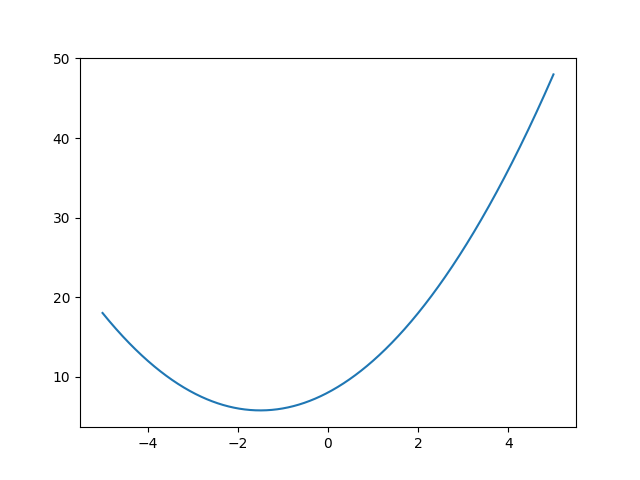

In [6]:
lst=np.array(lst)
y_lst=f1(lst)
steps=len(y_lst)

fig, ax = plt.subplots()
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

x_base=np.linspace(-5,5,1000)
y_base=f1(x_base)

ax.plot(x_base,y_base)

#Plot Animation
def grad_plot(frame):
    lngood.set_data(lst[frame],y_lst[frame])
    xall.append(lst[frame])
    yall.append(y_lst[frame])
    lnall.set_data(xall,yall)
ani=FuncAnimation(fig,grad_plot,frames=range(steps),interval=500,repeat=False)
plt.show()

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

- Using the same above defined function for finding the gradinet descent

0.0
117
1.6616615297491748 -4.045412051569727
The point of minima is : 1.6616615297491748 and the value is -4.045412051569727


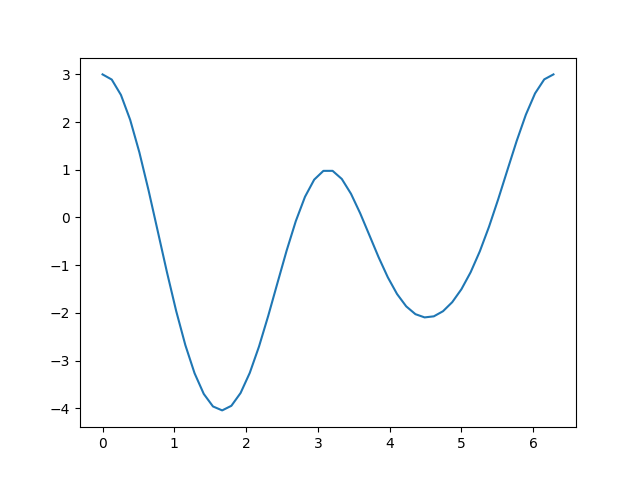

In [7]:
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
print(derivative(f5,0))

x_base=np.linspace(0,2*np.pi)
y_base=f5(x_base)

fig, ax = plt.subplots()
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
ax.plot(x_base,y_base)



min6,min_lst6,min_value=grad_descent_mod(f5,0,2*np.pi,learning_rate=0.01)
print(len(min_lst6))

print(min6,min_value)
print(f'The point of minima is : {min6} and the value is {f5(min6)}')

min_lst6=np.array(min_lst6)
y_lst6=f5(min_lst6)
steps=len(y_lst6)


#Plot Animation
def grad_plot(frame):
    lngood.set_data(min_lst6[frame],y_lst6[frame])
    xall.append(min_lst6[frame])
    yall.append(y_lst6[frame])
    lnall.set_data(xall,yall)
ani=FuncAnimation(fig,grad_plot,frames=range(steps),interval=50,repeat=False)
plt.show()

# Multivariable gradient descent function for two variable when derivative is given

In [9]:
import math
def grad_descent_multivariable2(func,derivative_x,derivative_y,xlim,ylim,learning_rate=0.1):
    
    start_point=[xlim[0],ylim[0]]
    end_point=[xlim[1],ylim[1]]
    start_point=np.array(start_point,dtype=float)
    end_point=np.array(end_point,dtype=float)
    min_point=start_point
    min_points_lst=[]
    min_points_lst.append(start_point)
    def deri(x):
        return np.array([derivative_x(x[0],x[1]),derivative_y(x[0],x[1])])
    
    min_point=start_point
    while(min_point[0]<=end_point[0] and min_point[1]<=end_point[1]):
        point=min_point
        min_point=min_point-(deri(point)*learning_rate)
#         print(min_point)
        min_points_lst.append(point)
        if(math.dist(min_point,point) <1e-7):
            break
    min_point=np.array(min_point,dtype=float)  
    min_points_lst=np.array(min_points_lst)      
    return min_point ,min_points_lst




## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [10]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

min_p2,min_points_lst_p2=grad_descent_multivariable2(f3,df3_dx,df3_dy,xlim3,ylim3,0.001)
y_val_lst_p2=[]
for ele in min_points_lst_p2:
    # print(ele)
    y_val_lst_p2.append(f3(ele[0],ele[1]))
print(len(y_val_lst_p2),len(min_points_lst_p2))

print(f"Minimum point found: [{min_p2[0]}, {min_p2[1]}] and value is:{f3(min_p2[0],min_p2[1])}")

# x=np.linspace(-10,10,1000)
# y=np.linspace(-10,10,1000)
# z=np.meshgrid(x,y)
# z=np.array(f3(x,y))




146184 146184
Minimum point found: [3.9707599990549287, 1.9999999999999445] and value is:2.0000007309868124


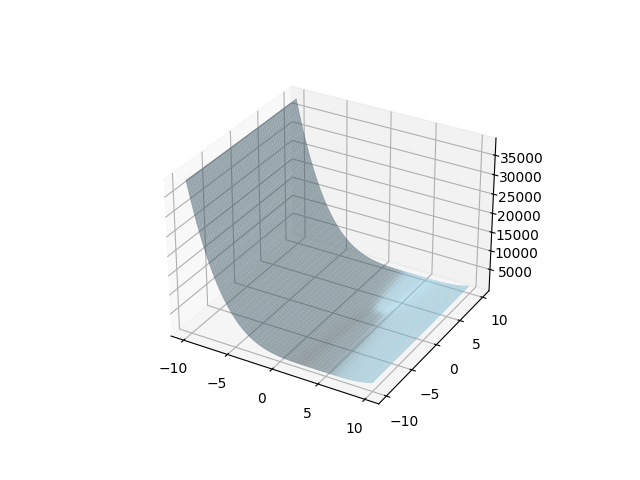

In [11]:
#3-d animation same as above written
import math
def grad_descent_mult2(func,deri_x,deri_y,xlim,ylim,learning_rate=0.1):
    start_point=[xlim[0],ylim[0]]
    end_point=[xlim[1],ylim[1]]
    start_point=np.array(start_point,dtype=float)
    end_point=np.array(end_point,dtype=float)
    min_point=start_point
    point_array=[]
    point_array.append(start_point)
    def deri(x):
        return np.array([deri_x(x[0],x[1]),deri_y(x[0],x[1])])
    
    min_point=start_point
    while(min_point[0]<=end_point[0] and min_point[1]<=end_point[1]):
        point=min_point
        min_point=min_point-(deri(point)*learning_rate)
#         print(min_point)
        point_array.append(min_point)
        if(math.dist(min_point,point) <1e-7):
            break
    min_point=np.array(min_point,dtype=float)
    point_array=np.array(point_array,dtype=float)
    return point_array
    



fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = np.linspace(xlim3[0], xlim3[1], 1000)
y = np.linspace(ylim3[0], ylim3[1], 1000)

X, Y = np.meshgrid(x, y)
Z = np.array(f3(X,Y))
# print(Z)
ax.plot_surface(X, Y, Z,color='skyblue', alpha=0.5)


def update(i):
    
    point_array=grad_descent_mult2(f3,df3_dx,df3_dy,xlim3,ylim3,0.001) 
    # Plot the points in the array
    ax.scatter(point_array[:i, 0], point_array[:i, 1],f3(point_array[:i, 0], point_array[:i, 1]), color='red')

point_array=grad_descent_mult2(f3,df3_dx,df3_dy,xlim3,ylim3,0.001)

ani = FuncAnimation(fig, update, frames=len(point_array)+1, interval=50,repeat=False)
plt.show()

## Problem 3 - 2-D function 

Derivatives and limits given. 

In [12]:
xlim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)
min_p3,min_point_lst_p3=grad_descent_multivariable2(f4,f4_dx,f4_dy,xlim4,xlim4)
# print(f4(min_p3[0],min_p3[1]))
print(min_p3)

[-1.57079801 -1.57079764]


In [13]:
print(f"Minimum point found: [{min_p3[0]}, {min_p3[1]}] and value is:{f4(min_p3[0],min_p3[1])}")

Minimum point found: [-1.5707980107411377, -1.5707976415803913] and value is:-0.9999999999989994


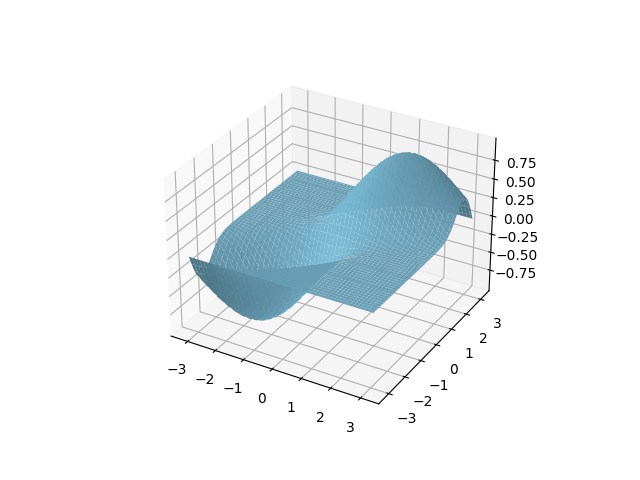

In [14]:

import math
def grad_descent_mult2(func,deri_x,deri_y,xlim,ylim,learning_rate=0.1):
    
    start_point=[xlim[0],xlim[0]]
    end_point=[xlim[1],xlim[1]]
    start_point=np.array(start_point,dtype=float)
    end_point=np.array(end_point,dtype=float)
    min_point=start_point
    point_array=[]
    point_array.append(start_point)
    def deri(x):
        return np.array([deri_x(x[0],x[1]),deri_y(x[0],x[1])])
    
    min_point=start_point
    while(min_point[0]<=end_point[0] and min_point[1]<=end_point[1]):
        point=min_point
        min_point=min_point-(deri(point)*learning_rate)
#         print(min_point)
        point_array.append(min_point)
        if(math.dist(min_point,point) <1e-7):
            break
    min_point=np.array(min_point,dtype=float)
    point_array=np.array(point_array,dtype=float)
    return point_array

#3d plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.linspace(xlim4[0], xlim4[1], 100)
y = np.linspace(xlim4[0], xlim4[1], 100)
X, Y = np.meshgrid(x, y)
Z = np.array(f4(X,Y))
# print(Z)
ax.plot_surface(X, Y, Z,color='skyblue')


def update(i):
    point_array=grad_descent_mult2(f4,f4_dx,f4_dy,xlim4,xlim4,0.1) 
    # updating the points in the Plot 
    ax.scatter(point_array[:i, 0], point_array[:i, 1],f4(point_array[:i, 0], point_array[:i, 1]), color='red')

point_array=grad_descent_mult2(f4,f4_dx,f4_dy,xlim4,xlim4,0.1)

plt.show()
ani = FuncAnimation(fig, update, frames=len(point_array)+1, interval=50,repeat=False)

# Generalised Multivariable function to calculate derivative and find minimum using Gradient descent approach
# Generalised  Approach
### Assumption :
- input of functins are given as list or arry which is iterable i.e. f([x,y,z,.....])
- The input of **gradient_descent_general** function is **function ,der=> the defined der function just below with the function itself as an argument and range of value of each of variable in the form of list e.g. [[x1,x2],[y1,y2],[z1,z2],....].
- the defined der function find the derivative of any given function and return the derivative with the respect to each variable as list.
- I have also tested the generalised approach for all the above four problem and the output is printed below in the respective section probem-wise.


In [ ]:
delta=1e-5
# Function to calculate derivative of any generalised function with any no of variable
def der(f):
    def wrapper(input_list):
        myderivatives=[]  # for storage of derivatives w.r.t different variables
        total_dimensions=len(input_list)
        for index in range(total_dimensions):
            myderivative_input=list(input_list)
            myderivative_input[index]+=delta   # (f(x+dx)-f(x))/dx for finding derivative w.r.t x and applied for each of the variable
            myderivatives.append((f(myderivative_input)-f(input_list))/delta) # finding derivative w.r.t each of the variable and storing
        return myderivatives 
    return wrapper

### Implementing generalised gradient descent for finding the minimum of any generalised multivariable function

In [ ]:
# Generalised function to find the gradient of any multivariable function the 
def gradient_descent_general(fxn,deri,range_list):
    total_dimensions=len(range_list) # total no of variable = length of rangelist given 
    # print(total_dimensions)
    parameters_list=[range_list[i][0] for i in range(total_dimensions)]
    fxn_value=fxn(parameters_list)
    lr=0.001   # learning rate 
    steps=10000  
    derivatives=[]
    for step in range(steps):
        del derivatives
        derivatives=list(deri(parameters_list))
        # print(derivatives)
        for parameter_index in range(total_dimensions):
            parameters_list[parameter_index]=parameters_list[parameter_index]-derivatives[parameter_index]*lr
        fxn_value=fxn(parameters_list)
    return fxn_value,parameters_list,derivatives

# Finding minimum using Genralised approach for problem 1

In [ ]:
# Creating Function according to the above condition mentioned so to implement generalised approach
def f11(lst):
    x=lst[0]
    return x ** 2 + 3 * x + 8
value,point,derivatives=gradient_descent_general(f11,der(f11),[[-5,-5]])
print(f'PROBLEM 1 : The minimum point : {point[0]}  and value at that point : {value} ')

## Finding Minimum Usuing Genaralised approach for Problem-2

In [ ]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f33(lst):
    x=lst[0]
    y=lst[1]
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262
value,point,derivatives=gradient_descent_general(f33,der(f33),[xlim3,ylim3])
print(f'PROBLEM 2 : The minimum point : [{point[0]} ,{point[1]}] and value at that point : {value} ')

## Finding Minimum Usuing Genaralised approach for Problem-3

In [ ]:
xlim4 = [-pi, pi]
def f44(lst):
    x=lst[0]
    y=lst[1]
    return exp(-(x - y)**2)*sin(y)
value,point,derivatives=gradient_descent_general(f44,der(f44),[xlim4,xlim4])
print(f'PROBLEM 3 : The minimum point : [{point[0]} ,{point[1]}] and value at that point : {value} ')

## Finding Minimum Usuing Genaralised approach for Problem-4

In [ ]:
def f55(lst):
    x=lst[0]
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
value,point,derivatives=gradient_descent_general(f11,der(f11),[[0.01,2*np.pi]])
print(f'PROBLEM 4 : The minimum point : {point[0]}  and value at that point : {value} ')

# Explanation of above output and code
- As we can see the output of the generalised approach is approximately same as the code implemented using derivative individually
- using this approach we can find the local minimum of any generalised funciton.
